In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [248]:
df = pd.read_csv('todo.csv')
df.dtypes
df['fecha'] = pd.to_datetime(df['fecha'])

In [249]:
df.rename(columns={'fecha': 'ds', 'abierto/cerrado': 'y'}, inplace=True)
df = df.drop(columns={'Unnamed: 0'})
df

,ds,y,ao
0,2014-01-16,1,94.8
1,2014-01-17,1,94.8
2,2014-01-18,1,94.8
3,2014-01-19,1,94.8
4,2014-01-20,1,94.8
...,...,...,...
3632,2023-12-27,0,0.0
3633,2023-12-28,0,0.0
3634,2023-12-29,0,0.0
3635,2023-12-30,0,0.0


In [250]:
train_size = 0.7  # 70% para entrenamiento
train, test = train_test_split(df, train_size=train_size, shuffle=False, random_state=42)

model=Prophet(growth='flat', seasonality_prior_scale=0.1, changepoint_prior_scale=0.5)
#model.add_regressor('ao', standardize='auto', prior_scale=0.7, mode='additive')
model.fit(train)

future = test[['ds']]
test

12:40:46 - cmdstanpy - INFO - Chain [1] start processing
12:40:46 - cmdstanpy - INFO - Chain [1] done processing


,ds,y,ao
2545,2021-01-04,1,59.3
2546,2021-01-05,1,59.3
2547,2021-01-06,1,59.3
2548,2021-01-07,1,59.3
2549,2021-01-08,1,59.3
...,...,...,...
3632,2023-12-27,0,0.0
3633,2023-12-28,0,0.0
3634,2023-12-29,0,0.0
3635,2023-12-30,0,0.0


In [251]:
forecast = model.predict(future)

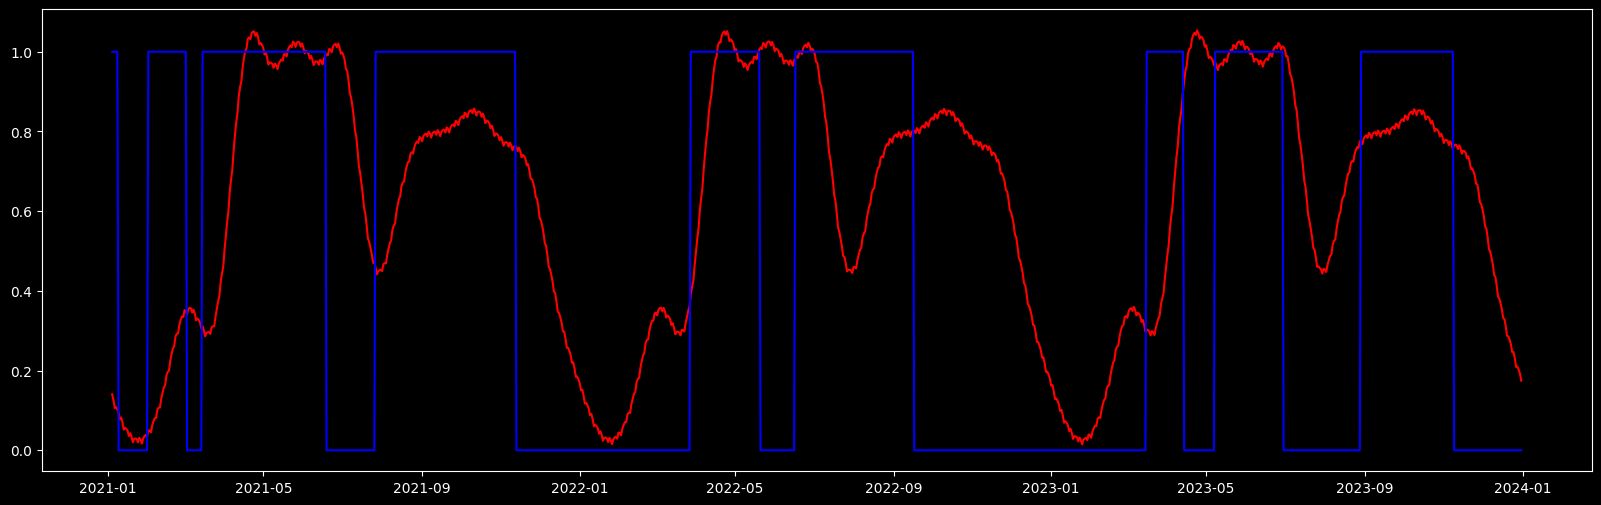

In [252]:
plt.figure(figsize=(20,6))
plt.plot(forecast['ds'], forecast['yhat'], color = 'red', label = 'predicted')
plt.plot(test['ds'], test['y'], color = 'blue', label = 'actual')

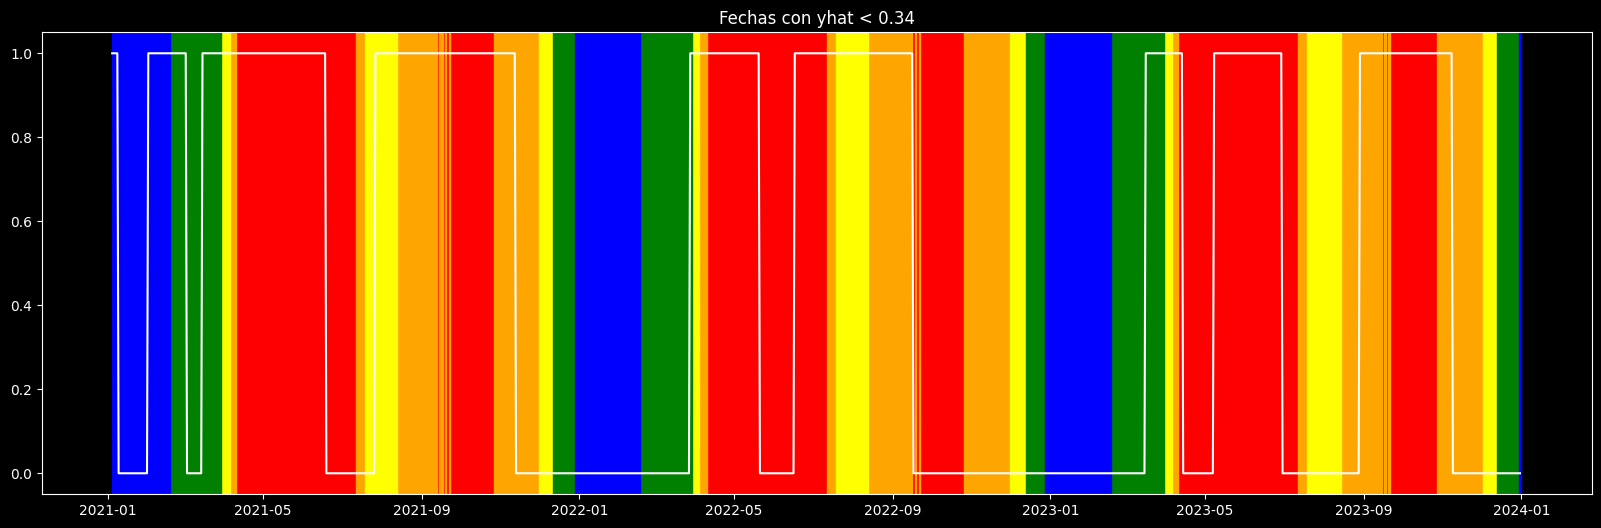

In [254]:
forecast['ds'] = pd.to_datetime(forecast['ds'])

ranges = [(0.8, 2, 'red', 1),
          (0.6, 0.8, 'orange', 1),
          (0.4, 0.6, 'yellow', 1),
          (0.2, 0.4, 'green', 1),
          (-1, 0.2, 'blue', 1)]  

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(test['ds'], test['y'],  linestyle='-', color='w')

fechas_a_pintar = forecast[forecast['yhat'] < 0.34]['ds']

for ymin, ymax, color, alpha in ranges:
    fechas_a_pintar = forecast[(forecast['yhat'] >= ymin) & (forecast['yhat'] < ymax)]['ds']
    for date in fechas_a_pintar:
        ax.axvspan(date, date + pd.Timedelta(days=1), color=color, alpha=1)

plt.title('Fechas con yhat < 0.34')
plt.show()